In [2]:
import keras
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('ggplot')

In [33]:
raga_labels = ['Bag', 'Bahar', 'Bilas', 'Jaun', 'Kedar', 'MM', 'Marwa', 'Nand', 'Shree']
data_paths = ['../Seqs/finalData/pitch/easy_1/AG-norm.npz', '../Seqs/finalData/pitch/hard_2/AG-norm.npz']
model_paths = ['/home/nithya/Desktop/easy_1-AG.hdf5', '/home/nithya/Desktop/hard_2-AG.hdf5']

### Load and Process Data

In [18]:
def process(data_path, model_path):
    
    # load data
    data = np.load(data_path)
    X_train = np.append(data['X_train'], data['mask_train'], axis=-1)
    y_train = to_categorical(data['y_train'])
    X_test = np.append(data['X_test'], data['mask_test'], axis=-1)
    y_test = to_categorical(data['y_test'])
    
    # load model
    model = load_model(model_path)
    
    # predict train and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return y_pred_train, data['y_train'], y_pred_test, data['y_test']

### Compute Metrics

In [19]:
train_preds = []
train_ys = []
test_preds = []
test_ys = []
for i in range(len(data_paths)):
    print(i)
    train_pred, y_train, test_pred, y_test = process(data_paths[i], model_paths[i])
    train_preds.append(train_pred)
    train_ys.append(y_train)
    test_preds.append(test_pred)
    test_ys.append(y_test)

0
1


In [48]:
correct_preds = []
incorrect_preds = []
for ind, y_val in enumerate(test_ys[1]):
    if y_val[0] == np.argmax(test_preds[1][ind]):
        correct_preds.append(test_preds[1][ind][y_val[0]])
    else:
        incorrect_ind = np.argmax(test_preds[1][ind])
        incorrect_preds.append(test_preds[1][ind][incorrect_ind])

[0.35149804 0.54149944 0.80600203]


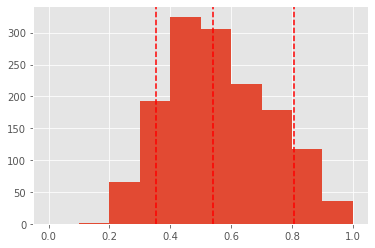

In [49]:
plt.hist(correct_preds, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(correct_preds, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

[0.25263331 0.35068016 0.50663408]


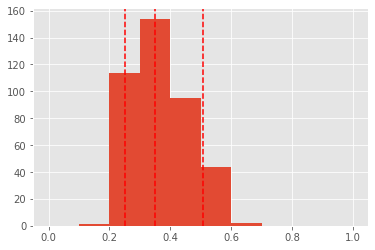

In [50]:
plt.hist(incorrect_preds, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(incorrect_preds, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

In [32]:
np.mean(train_preds[0][np.ravel(train_ys[0]) == 0], axis=0)

array([0.65456676, 0.11638492, 0.02749875, 0.05823705, 0.02655834,
       0.09212144, 0.01990687, 0.00405077, 0.00067472], dtype=float32)

### Plot Metrics

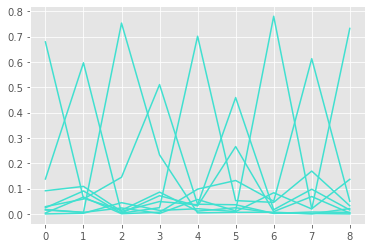

In [36]:
plt.plot(np.arange(9), [np.mean(test_preds[0][np.ravel(test_ys[0]) == i], axis=0) for i in range(9)], label=raga_labels[i], c=c[i])

In [22]:
def plot(metrics0, metrics1, keyword, ax, xlabel=False, ylabel=False, singer=None):
    y_vals0 = [metrics0[key][keyword] for key in list(metrics0.keys()) if not((key == 'accuracy')|(key == 'macro avg')|(key == 'weighted avg'))]
    ax.plot(np.arange(len(y_vals0)), y_vals0, color='blue', label='v0')
    ax.axhline(metrics0['macro avg'][keyword], linestyle='--', color='blue')
    y_vals1 = [metrics1[key][keyword] for key in list(metrics1.keys()) if not((key == 'accuracy')|(key == 'macro avg')|(key == 'weighted avg'))]
    x = ax.plot(np.arange(len(y_vals1)), y_vals1, color='orange', label='test')
    ax.axhline(metrics1['macro avg'][keyword], linestyle='--', color='orange')
    ax.set_ylim(0.2, 0.85)
    if xlabel:
        ax.set_xticks(np.arange(len(labels)))
        ax.set_xticklabels(labels)
        ax.set_xlabel(singer)
    else:
        ax.set_xticks(np.arange(len(labels)))
        ax.set_xticklabels([])
    if ylabel:
        ax.set_ylabel(keyword)
    return x

In [23]:
for iind, keyword in enumerate(['precision', 'recall', 'f1-score']):
    for jind, singer in enumerate(['AG', 'CC', 'SCh']):
        x = plot(test_metrics[jind], test_metrics[jind+3], keyword, axs[iind, jind], xlabel=(iind==2), ylabel=(jind==0), singer=singer)

In [24]:
fig.legend(['v0', 'macro avg precision', 'v1', 'macro avg recall'])

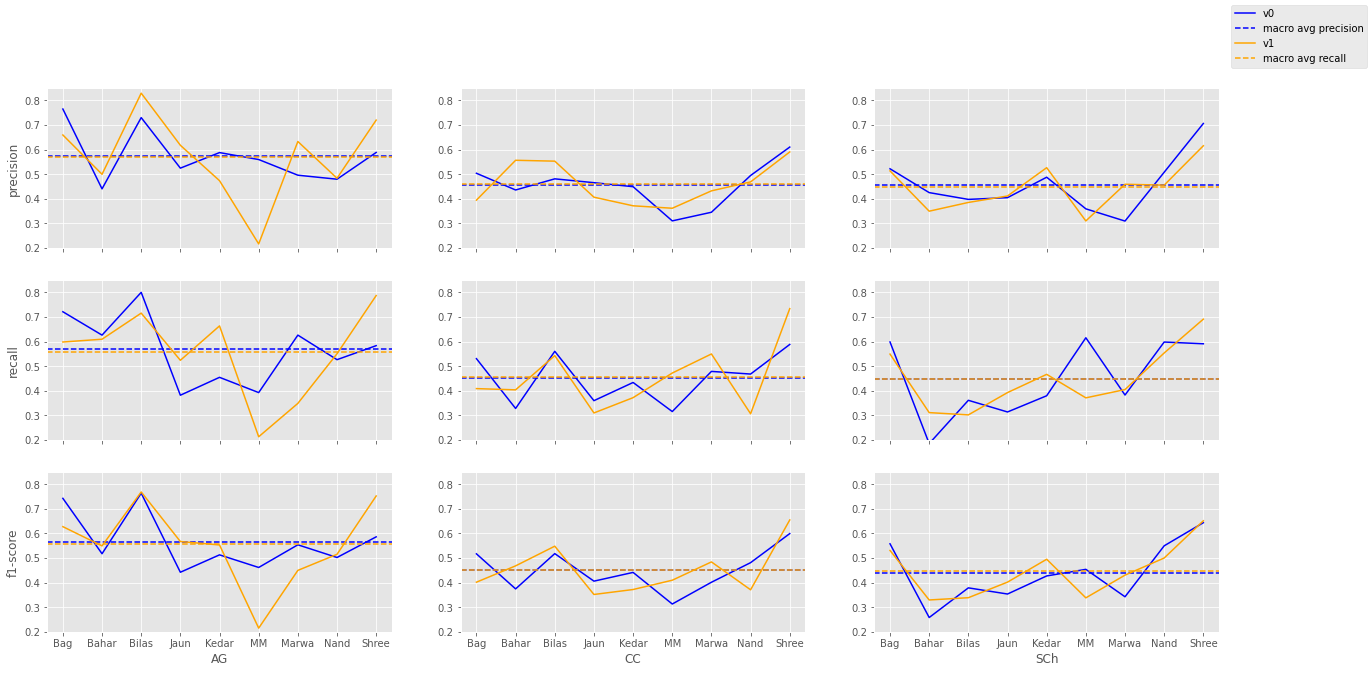

In [25]:
fig

In [26]:
fig.savefig('../Figs/test-compare.png')